# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

# Loading the Dataset and Selecting Variables

In [2]:
df_X_train = pd.read_csv('df_inputs_train.csv', index_col=0)
df_y_train = pd.read_csv('df_targets_train.csv', index_col=0) 
df_X_test = pd.read_csv('df_inputs_test.csv', index_col=0)
df_y_test = pd.read_csv('df_targets_test.csv', index_col=0) 

In [3]:
df_y_train.value_counts()

good_bad
1           373787
0            45869
dtype: int64

In [4]:
df_y_test.value_counts()

good_bad
1           41530
0            5099
dtype: int64

### Exploring Data

In [5]:
df_X_train.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,mths_since_last_record:0-2,mths_since_last_record:3-14,mths_since_last_record:15-21,mths_since_last_record:22-31,mths_since_last_record:32-50,mths_since_last_record:51-70,mths_since_last_record:71-79,mths_since_last_record:80-84,mths_since_last_record:85-96,mths_since_last_record:>=97
58619,9011631,10803033,25000,25000,25000.0,36 months,13.67,850.44,B,B5,...,0,0,0,0,0,0,0,0,0,0
389825,16421396,18503935,7150,7150,7150.0,36 months,10.99,234.05,B,B3,...,0,0,0,0,0,0,0,0,0,0
119082,6094970,7567123,33950,33950,33950.0,36 months,15.22,1180.55,C,C3,...,0,0,0,0,0,0,0,0,0,0
232381,37107753,39870543,16800,16800,16800.0,60 months,11.44,368.97,B,B4,...,0,0,0,0,0,0,0,0,0,0
155122,3733016,4726207,10000,10000,10000.0,36 months,13.11,337.47,B,B4,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_y_train.head()

,good_bad
58619,1
389825,1
119082,0
232381,1
155122,1


In [7]:
df_X_train.shape

(419656, 331)

In [8]:
df_y_train.shape

(419656, 1)

In [9]:
df_X_test.shape

(46629, 331)

In [10]:
df_y_test.shape

(46629, 1)

In [11]:
y_train = df_y_train
y_test = df_y_test

### Selecting Variables

In [12]:
# We choose a set of dummy variables associated with the original independent variables
X_train_with_refs = df_X_train.loc[:, ['addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',   
'grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:OTHER_NONE_RENT_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',                                            
'purpose:sm_b__edu__mov__ren_en__house__oth',
'purpose:med__wed__vacation',
'purpose:debt_consolidation',                                            
'purpose:home_impr__major_purch__car',
'purpose:credit_card',                                             
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',                                            
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',                                                                   
'mths_since_issue_d:<104',
'mths_since_issue_d:104-105',
'mths_since_issue_d:105-110',
'mths_since_issue_d:110-114',
'mths_since_issue_d:114-125',
'mths_since_issue_d:125-134',
'mths_since_issue_d:134-153',
'mths_since_issue_d:153-170',                                             
'mths_since_issue_d:170-186',
'mths_since_issue_d:>=186',                                            
'int_rate:<=9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-21.106',
'int_rate:>21.106',                                            
'mths_since_earliest_cr_line:<304',                      
'mths_since_earliest_cr_line:304-418',
'mths_since_earliest_cr_line:418-493',
'mths_since_earliest_cr_line:493-512',
'mths_since_earliest_cr_line:512-607',
'mths_since_earliest_cr_line:607-664',
'mths_since_earliest_cr_line:>=664',                                             
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-24',
'open_acc:25-32',
'open_acc:>=33',
'pub_rec:0-2',
'pub_rec:3-5',
'pub_rec:>=6',
'total_acc:<=21',
'total_acc:22-63',
'total_acc:>=64',            
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-150K',
'annual_inc:>150K',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-22',
'mths_since_last_delinq:23-37',
'mths_since_last_delinq:38-56',
'mths_since_last_delinq:57-60',
'mths_since_last_delinq:61-82',
'mths_since_last_delinq:>=83',                                                                                         
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-8.4',
'dti:8.4-10.5',                                             
'dti:10.5-15.4',
'dti:15.4-18.2',
'dti:18.2-21.7',
'dti:21.7-26.6',
'dti:26.6-35',
'dti:>35',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-14',
'mths_since_last_record:15-21',                                             
'mths_since_last_record:22-31',
'mths_since_last_record:32-50',
'mths_since_last_record:51-70',
'mths_since_last_record:71-79',
'mths_since_last_record:80-84',
'mths_since_last_record:85-96',                                             
'mths_since_last_record:>=97']]

In [13]:
# We consider the categories with the lowest WoE (highest risk) as the reference categories
ref_categories = ['grade:G',
'addr_state:ND_NE_IA_NV_FL_HI_AL',       
'home_ownership:OTHER_NONE_RENT_ANY',
'verification_status:Verified',
'purpose:sm_b__edu__mov__ren_en__house__oth',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>=186',                 
'int_rate:>21.106',
'mths_since_earliest_cr_line:>=664',           
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:>=33',
'pub_rec:>=6',
'total_acc:>=64',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'mths_since_last_delinq:0-3',                         
'dti:>35',
'mths_since_last_record:0-2']                

In [14]:
X_train = X_train_with_refs.drop(ref_categories, axis=1)
X_train.head()

,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,...,mths_since_last_record:Missing,mths_since_last_record:3-14,mths_since_last_record:15-21,mths_since_last_record:22-31,mths_since_last_record:32-50,mths_since_last_record:51-70,mths_since_last_record:71-79,mths_since_last_record:80-84,mths_since_last_record:85-96,mths_since_last_record:>=97
58619,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
389825,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
119082,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
232381,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
155122,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


# PD Model Estimation

### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

In [16]:
pd.set_option('display.max_rows', None)

In [17]:
features = X_train.columns
features

Index(['addr_state:NM_VA', 'addr_state:NY', 'addr_state:OK_TN_MO_LA_MD_NC',
       'addr_state:CA', 'addr_state:UT_KY_AZ_NJ', 'addr_state:AR_MI_PA_OH_MN',
       'addr_state:RI_MA_DE_SD_IN', 'addr_state:GA_WA_OR', 'addr_state:WI_MT',
       'addr_state:TX',
       ...
       'mths_since_last_record:Missing', 'mths_since_last_record:3-14',
       'mths_since_last_record:15-21', 'mths_since_last_record:22-31',
       'mths_since_last_record:32-50', 'mths_since_last_record:51-70',
       'mths_since_last_record:71-79', 'mths_since_last_record:80-84',
       'mths_since_last_record:85-96', 'mths_since_last_record:>=97'],
      dtype='object', length=112)

### Logistic Regression Model with P-Values

In [18]:
import scipy.stats as stat

class LogisticRegression_with_p_value:
    
    def __init__(self):                   
        self.model = LogisticRegression(class_weight='balanced', max_iter=100000, multi_class='ovr') 

    def fit(self, X, y):
        self.model.fit(X, y)
        denom = (2 * (1 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom, (X.shape[1], 1)).T
        F_ij = np.dot((X / denom).T, X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_value = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_value = p_value

In [19]:
clf_log = LogisticRegression_with_p_value()

In [20]:
y_train.shape

(419656, 1)

In [21]:
clf_log.fit(X_train, y_train['good_bad'])

In [22]:
clf_log.intercept_

array([-2.98937255])

In [23]:
clf_log.coef_

array([[ 0.05696931,  0.05406197,  0.07339708,  0.08988899,  0.08768618,
         0.1511881 ,  0.09675448,  0.19819921,  0.24983437,  0.23746865,
         0.28609062,  0.32709737,  0.5142858 ,  1.21026751,  0.99675325,
         0.78480664,  0.58390954,  0.3715284 ,  0.21621894,  0.08776192,
         0.11671543,  0.09157849, -0.01313257,  0.16118094,  0.11065452,
         0.1724375 ,  0.20935581,  0.04162372,  0.05497378,  0.09790109,
         0.12058989,  0.09552221,  0.07306538,  0.1399529 ,  0.25745886,
         0.02007315, -0.07302633, -0.2080442 , -0.44380818, -0.71091793,
        -0.62081812, -0.47697414, -0.95347123,  0.9034375 ,  0.54529061,
         0.29635781,  0.11061372,  0.3592076 ,  0.43036147,  0.45618854,
         0.55190375,  0.45267308,  0.3174788 ,  0.00915863,  0.0302627 ,
         0.79892394,  0.64577568,  0.42972552, -0.85375888,  0.20305669,
         0.10445103,  0.08568477,  0.05562579, -0.30597446, -0.32299022,
         0.12309046,  0.08914436,  0.14257996,  0.0

In [24]:
d = {'Feature Name': features, 'Coefficient':clf_log.coef_.reshape(clf_log.coef_.shape[1],)}
summary_table = pd.DataFrame(data=d)
new_row = pd.DataFrame({'Feature Name':'intercept', 'Coefficient':clf_log.intercept_[0]}, index=[0])
summary_table = pd.concat([new_row, summary_table], axis=0).reset_index(drop=True) 

p_value = clf_log.p_value
p_value = np.append(np.nan, np.array(p_value))  
summary_table['p_value'] = p_value                    
summary_table

,Feature Name,Coefficient,p_value
0,intercept,-2.989373,NaN
1,addr_state:NM_VA,0.056969,4.976446e-03
2,addr_state:NY,0.054062,4.655979e-04
3,addr_state:OK_TN_MO_LA_MD_NC,0.073397,6.378483e-07
4,addr_state:CA,0.089889,3.072892e-11
5,addr_state:UT_KY_AZ_NJ,0.087686,2.566995e-08
6,addr_state:AR_MI_PA_OH_MN,0.151188,1.970538e-26
7,addr_state:RI_MA_DE_SD_IN,0.096754,1.654451e-07
8,addr_state:GA_WA_OR,0.198199,2.686681e-33
9,addr_state:WI_MT,0.249834,2.038933e-18


We choose features which are __statistically significant__ (p-values of all or most of the associated dummy variables < 0.05).<br>
We omit 'delinq_2yrs', 'open_acc', 'public_rec', 'total_acc', 'total_rev_hi_lim, 'mths_since_last_record'   

In [25]:
X_train_with_refs = df_X_train.loc[:, ['addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',   
'grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:OTHER_NONE_RENT_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',                                            
'purpose:sm_b__edu__mov__ren_en__house__oth',
'purpose:med__wed__vacation',
'purpose:debt_consolidation',                                            
'purpose:home_impr__major_purch__car',
'purpose:credit_card',                                             
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',                                            
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',                                                                   
'mths_since_issue_d:<104',
'mths_since_issue_d:104-105',
'mths_since_issue_d:105-110',
'mths_since_issue_d:110-114',
'mths_since_issue_d:114-125',
'mths_since_issue_d:125-134',
'mths_since_issue_d:134-153',
'mths_since_issue_d:153-170',                                             
'mths_since_issue_d:170-186',
'mths_since_issue_d:>=186',                                            
'int_rate:<=9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-21.106',
'int_rate:>21.106',                                            
'mths_since_earliest_cr_line:<304',                       
'mths_since_earliest_cr_line:304-418',
'mths_since_earliest_cr_line:418-493',
'mths_since_earliest_cr_line:493-512',
'mths_since_earliest_cr_line:512-607',
'mths_since_earliest_cr_line:607-664',
'mths_since_earliest_cr_line:>=664',                                             
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',           
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-150K',
'annual_inc:>150K',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-22',
'mths_since_last_delinq:23-37',
'mths_since_last_delinq:38-56',
'mths_since_last_delinq:57-60',
'mths_since_last_delinq:61-82',
'mths_since_last_delinq:>=83',                                                                                         
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-8.4',
'dti:8.4-10.5',                                             
'dti:10.5-15.4',
'dti:15.4-18.2',
'dti:18.2-21.7',
'dti:21.7-26.6',
'dti:26.6-35',
'dti:>35']]

In [26]:
ref_categories = ['grade:G',
'addr_state:ND_NE_IA_NV_FL_HI_AL',       
'home_ownership:OTHER_NONE_RENT_ANY',
'verification_status:Verified',
'purpose:sm_b__edu__mov__ren_en__house__oth',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>=186',                  
'int_rate:>21.106',
'mths_since_earliest_cr_line:>=664',           
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'mths_since_last_delinq:0-3',                       
'dti:>35']

In [27]:
X_train = X_train_with_refs.drop(ref_categories, axis=1)
X_train.head()

,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,...,mths_since_last_delinq:>=83,dti:<=1.4,dti:1.4-3.5,dti:3.5-8.4,dti:8.4-10.5,dti:10.5-15.4,dti:15.4-18.2,dti:18.2-21.7,dti:21.7-26.6,dti:26.6-35
58619,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
389825,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
119082,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
232381,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
155122,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [28]:
# We run a new logistic regression model with the new set of features
clf_log = LogisticRegression_with_p_value()
clf_log.fit(X_train, y_train['good_bad'])

In [29]:
features = X_train.columns
features

Index(['addr_state:NM_VA', 'addr_state:NY', 'addr_state:OK_TN_MO_LA_MD_NC',
       'addr_state:CA', 'addr_state:UT_KY_AZ_NJ', 'addr_state:AR_MI_PA_OH_MN',
       'addr_state:RI_MA_DE_SD_IN', 'addr_state:GA_WA_OR', 'addr_state:WI_MT',
       'addr_state:TX', 'addr_state:IL_CT', 'addr_state:KS_SC_CO_VT_AK_MS',
       'addr_state:WV_NH_WY_DC_ME_ID', 'grade:A', 'grade:B', 'grade:C',
       'grade:D', 'grade:E', 'grade:F', 'home_ownership:OWN',
       'home_ownership:MORTGAGE', 'verification_status:Not Verified',
       'verification_status:Source Verified', 'purpose:med__wed__vacation',
       'purpose:debt_consolidation', 'purpose:home_impr__major_purch__car',
       'purpose:credit_card', 'initial_list_status:w', 'term:36',
       'emp_length:1', 'emp_length:2-4', 'emp_length:5-6', 'emp_length:7-9',
       'emp_length:10', 'mths_since_issue_d:<104',
       'mths_since_issue_d:104-105', 'mths_since_issue_d:105-110',
       'mths_since_issue_d:110-114', 'mths_since_issue_d:114-125',
      

In [30]:
len(features)

84

In [31]:
d = {'Feature Name':features, 'Coefficient':clf_log.coef_.reshape(clf_log.coef_.shape[1],)}
summary_table = pd.DataFrame(data=d)
new_row = pd.DataFrame({'Feature Name':'intercept', 'Coefficient':clf_log.intercept_[0]}, index=[0])
summary_table = pd.concat([new_row, summary_table], axis=0).reset_index(drop=True) 

p_value = clf_log.p_value
p_value = np.append(np.nan, np.array(p_value))
summary_table['p_value'] = p_value
summary_table

,Feature Name,Coefficient,p_value
0,intercept,-3.027477,NaN
1,addr_state:NM_VA,0.056521,5.289468e-03
2,addr_state:NY,0.055686,3.038637e-04
3,addr_state:OK_TN_MO_LA_MD_NC,0.071664,1.133413e-06
4,addr_state:CA,0.093783,3.983224e-12
5,addr_state:UT_KY_AZ_NJ,0.088710,1.703583e-08
6,addr_state:AR_MI_PA_OH_MN,0.150660,2.466326e-26
7,addr_state:RI_MA_DE_SD_IN,0.100387,5.416564e-08
8,addr_state:GA_WA_OR,0.201557,1.856839e-34
9,addr_state:WI_MT,0.246864,4.712536e-18


In [32]:
y_pred_train = clf_log.model.predict(X_train)

In [33]:
accuracy_score(y_true=y_train, y_pred=y_pred_train)      # It gives tp+tn

0.6265608021808339

In [34]:
f1_score(y_true=y_train, y_pred=y_pred_train, average=None, labels=[0,1])

array([0.27975807, 0.74793317])

In [35]:
import pickle
with open('pd_model.sav', 'wb') as f:
    pickle.dump(clf_log, f)

# PD Model Validation

In [36]:
X_test_with_refs = df_X_test.loc[: , ['addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',   
'grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:OTHER_NONE_RENT_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',                                            
'purpose:sm_b__edu__mov__ren_en__house__oth',
'purpose:med__wed__vacation',
'purpose:debt_consolidation',                                            
'purpose:home_impr__major_purch__car',
'purpose:credit_card',                                             
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',                                            
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',                                                                  
'mths_since_issue_d:<104',
'mths_since_issue_d:104-105',
'mths_since_issue_d:105-110',
'mths_since_issue_d:110-114',
'mths_since_issue_d:114-125',
'mths_since_issue_d:125-134',
'mths_since_issue_d:134-153',
'mths_since_issue_d:153-170',                                             
'mths_since_issue_d:170-186',
'mths_since_issue_d:>=186',                                            
'int_rate:<=9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-21.106',
'int_rate:>21.106',                                            
'mths_since_earliest_cr_line:<304',                       
'mths_since_earliest_cr_line:304-418',
'mths_since_earliest_cr_line:418-493',
'mths_since_earliest_cr_line:493-512',
'mths_since_earliest_cr_line:512-607',
'mths_since_earliest_cr_line:607-664',
'mths_since_earliest_cr_line:>=664',                                             
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',           
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-150K',
'annual_inc:>150K',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-22',
'mths_since_last_delinq:23-37',
'mths_since_last_delinq:38-56',
'mths_since_last_delinq:57-60',
'mths_since_last_delinq:61-82',
'mths_since_last_delinq:>=83',                                                                                         
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-8.4',
'dti:8.4-10.5',                                             
'dti:10.5-15.4',
'dti:15.4-18.2',
'dti:18.2-21.7',
'dti:21.7-26.6',
'dti:26.6-35',
'dti:>35']]

In [37]:
ref_categories = ['grade:G',
'addr_state:ND_NE_IA_NV_FL_HI_AL',       
'home_ownership:OTHER_NONE_RENT_ANY',
'verification_status:Verified',
'purpose:sm_b__edu__mov__ren_en__house__oth',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>=186',                 
'int_rate:>21.106',
'mths_since_earliest_cr_line:>=664',           
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'mths_since_last_delinq:0-3',                         
'dti:>35']

In [38]:
X_test = X_test_with_refs.drop(ref_categories, axis=1)
X_test.head()

,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,...,mths_since_last_delinq:>=83,dti:<=1.4,dti:1.4-3.5,dti:3.5-8.4,dti:8.4-10.5,dti:10.5-15.4,dti:15.4-18.2,dti:18.2-21.7,dti:21.7-26.6,dti:26.6-35
362514,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
288564,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
213591,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
263083,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
165001,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [39]:
y_pred_test = clf_log.model.predict(X_test)
y_pred_test

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [40]:
y_pred_proba = clf_log.model.predict_proba(X_test)
y_pred_proba

array([[0.36562377, 0.63437623],
       [0.56841235, 0.43158765],
       [0.52005296, 0.47994704],
       ...,
       [0.31008351, 0.68991649],
       [0.26504626, 0.73495374],
       [0.20183666, 0.79816334]])

In [41]:
y_pred_proba = y_pred_proba[:, 1]
y_pred_proba

array([0.63437623, 0.43158765, 0.47994704, ..., 0.68991649, 0.73495374,
       0.79816334])

In [42]:
df_y_test_temp = df_y_test
df_y_test_temp.reset_index(drop=True, inplace=True)
df_y_test_temp.head()

,good_bad
0,1
1,1
2,1
3,1
4,1


In [43]:
df_true_pred_probs = pd.concat([df_y_test_temp, pd.DataFrame(y_pred_proba)], axis=1)

In [44]:
df_true_pred_probs.shape

(46629, 2)

In [45]:
df_true_pred_probs.columns = ['targets_test', 'y_pred_proba']
df_true_pred_probs.index = df_X_test.index
df_true_pred_probs.head()

,targets_test,y_pred_proba
362514,1,0.634376
288564,1,0.431588
213591,1,0.479947
263083,1,0.636896
165001,1,0.806520


# PD Model Performance Measurement  

In [46]:
accuracy_score(y_true=y_test['good_bad'], y_pred=y_pred_test)  # It gives tp+tn

0.6263698556692188

In [47]:
f1_score(y_true=y_test, y_pred=y_pred_test, average=None, labels=[0,1])

array([0.28239558, 0.74743404])

### Confusion Matrix

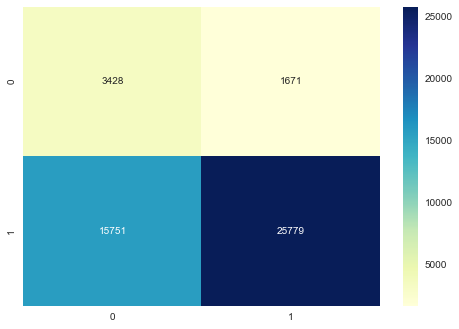

In [48]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred_test, labels=labels)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
sns.heatmap(df_cm, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

### Area Under the ROC Curve (AUROC)

In [49]:
roc_curve(df_true_pred_probs['targets_test'], df_true_pred_probs['y_pred_proba'])
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of true values and their pred probabilities.

(array([0.        , 0.        , 0.        , ..., 0.99980388, 1.        ,
        1.        ]),
 array([0.00000000e+00, 2.40789791e-05, 3.44329400e-03, ...,
        9.99879605e-01, 9.99879605e-01, 1.00000000e+00]),
 array([1.92818645, 0.92818645, 0.8984528 , ..., 0.09193814, 0.08824439,
        0.0518215 ]))

In [50]:
fpr, tpr, thresholds = roc_curve(df_true_pred_probs['targets_test'], df_true_pred_probs['y_pred_proba'])

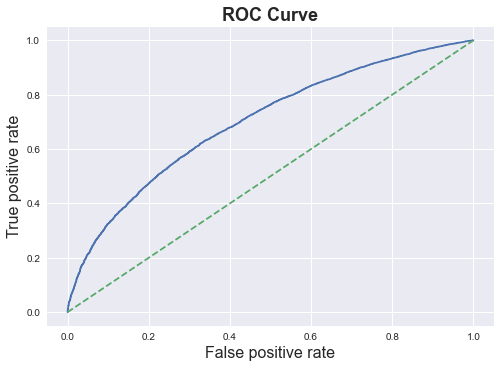

In [51]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--') 
plt.xlabel('False positive Rate', size=16)
plt.ylabel('True Positive Rate', size=16)
plt.title('ROC Curve', fontdict={'fontweight':'bold', 'fontsize':18})
plt.show()

In [52]:
AUROC = roc_auc_score(df_true_pred_probs['targets_test'], df_true_pred_probs['y_pred_proba'])
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
AUROC

0.7005557266862569

### Gini Coefficient

In [53]:
df_true_pred_probs = df_true_pred_probs.sort_values('y_pred_proba')
df_true_pred_probs.head()

,targets_test,y_pred_proba
42341,1,0.051822
41742,1,0.057559
41549,1,0.084151
41948,1,0.085348
41820,1,0.088045


In [54]:
df_true_pred_probs.tail()

,targets_test,y_pred_proba
282589,1,0.924318
312549,1,0.924549
363684,1,0.924870
298205,1,0.925475
310936,1,0.928186


In [55]:
df_true_pred_probs = df_true_pred_probs.reset_index()
df_true_pred_probs.head()

,index,targets_test,y_pred_proba
0,42341,1,0.051822
1,41742,1,0.057559
2,41549,1,0.084151
3,41948,1,0.085348
4,41820,1,0.088045


In [56]:
df_true_pred_probs['Cumulative N Population'] = df_true_pred_probs.index + 1    # Cumulative number of all observations
df_true_pred_probs['Cumulative N Good'] = df_true_pred_probs['targets_test'].cumsum() # Cumulative number of 'good' borrowers
df_true_pred_probs['Cumulative N Bad'] = df_true_pred_probs['Cumulative N Population'] - df_true_pred_probs['Cumulative N Good']
# Cumulative number of 'bad' borrowers

In [57]:
df_true_pred_probs.head()

,index,targets_test,y_pred_proba,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,42341,1,0.051822,1,1,0
1,41742,1,0.057559,2,2,0
2,41549,1,0.084151,3,3,0
3,41948,1,0.085348,4,4,0
4,41820,1,0.088045,5,5,0


In [58]:
df_true_pred_probs['Cumulative Perc Population'] = df_true_pred_probs['Cumulative N Population'] / (df_true_pred_probs.index[-1] + 1)
# Cumulative percentage of all observations
df_true_pred_probs['Cumulative Perc Good'] = df_true_pred_probs['Cumulative N Good'] / df_true_pred_probs['targets_test'].sum()
# Cumulative percentage of 'good' borrowers
df_true_pred_probs['Cumulative Perc Bad'] = df_true_pred_probs['Cumulative N Bad'] / ((df_true_pred_probs.index[-1] + 1) - df_true_pred_probs['targets_test'].sum())
# Cumulative percentage of 'bad' borrowers

In [59]:
df_true_pred_probs.head()

,index,targets_test,y_pred_proba,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,42341,1,0.051822,1,1,0,0.000021,0.000024,0.0
1,41742,1,0.057559,2,2,0,0.000043,0.000048,0.0
2,41549,1,0.084151,3,3,0,0.000064,0.000072,0.0
3,41948,1,0.085348,4,4,0,0.000086,0.000096,0.0
4,41820,1,0.088045,5,5,0,0.000107,0.000120,0.0


In [60]:
df_true_pred_probs.tail()

,index,targets_test,y_pred_proba,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
46624,282589,1,0.924318,46625,41526,5099,0.999914,0.999904,1.0
46625,312549,1,0.924549,46626,41527,5099,0.999936,0.999928,1.0
46626,363684,1,0.924870,46627,41528,5099,0.999957,0.999952,1.0
46627,298205,1,0.925475,46628,41529,5099,0.999979,0.999976,1.0
46628,310936,1,0.928186,46629,41530,5099,1.000000,1.000000,1.0


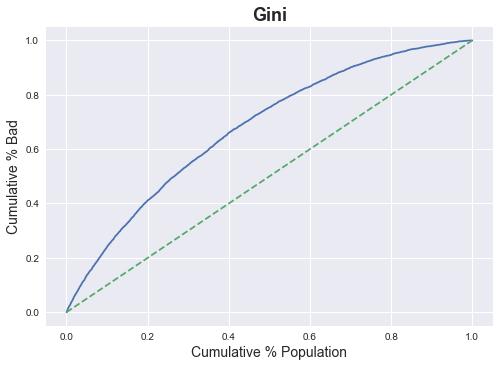

In [61]:
plt.plot(df_true_pred_probs['Cumulative Perc Population'], df_true_pred_probs['Cumulative Perc Bad'])
plt.plot([0, 1], [0, 1], '--') 
plt.xlabel('Cumulative % Population', size=14)
plt.ylabel('Cumulative % Bad', size=14)
plt.title('Gini', fontdict={'fontweight':'bold', 'fontsize':18})
plt.show()

In [62]:
Gini = 2 * AUROC  - 1
Gini

0.40111145337251375

### Kolmogorov-Smirnov Coefficient

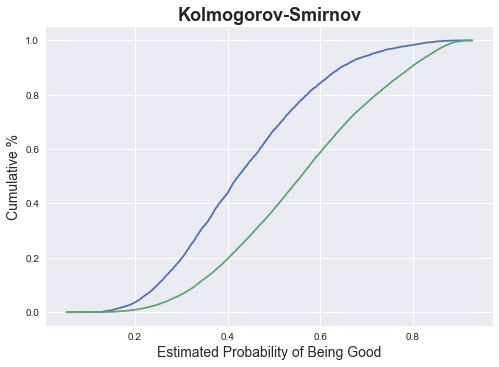

In [63]:
plt.plot(df_true_pred_probs['y_pred_proba'], df_true_pred_probs['Cumulative Perc Bad'])
plt.plot(df_true_pred_probs['y_pred_proba'], df_true_pred_probs['Cumulative Perc Good'])
plt.xlabel('Estimated Probability of Being Good', size=14)       # Predicted Probability of being Good (Non-defaulted)
plt.ylabel('Cumulative %', size=14)
plt.title('Kolmogorov-Smirnov', fontdict={'fontweight':'bold', 'fontsize':18})
plt.show()

In [64]:
KS = max(df_true_pred_probs['Cumulative Perc Bad'] - df_true_pred_probs['Cumulative Perc Good'])
KS

0.2934886407805915

# Applying the PD Model

In [65]:
X_test_with_refs.head()

,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,...,dti:<=1.4,dti:1.4-3.5,dti:3.5-8.4,dti:8.4-10.5,dti:10.5-15.4,dti:15.4-18.2,dti:18.2-21.7,dti:21.7-26.6,dti:26.6-35,dti:>35
362514,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
213591,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
263083,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
165001,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [66]:
summary_table

,Feature Name,Coefficient,p_value
0,intercept,-3.027477,NaN
1,addr_state:NM_VA,0.056521,5.289468e-03
2,addr_state:NY,0.055686,3.038637e-04
3,addr_state:OK_TN_MO_LA_MD_NC,0.071664,1.133413e-06
4,addr_state:CA,0.093783,3.983224e-12
5,addr_state:UT_KY_AZ_NJ,0.088710,1.703583e-08
6,addr_state:AR_MI_PA_OH_MN,0.150660,2.466326e-26
7,addr_state:RI_MA_DE_SD_IN,0.100387,5.416564e-08
8,addr_state:GA_WA_OR,0.201557,1.856839e-34
9,addr_state:WI_MT,0.246864,4.712536e-18


In [67]:
y_pred_proba

array([0.63437623, 0.43158765, 0.47994704, ..., 0.68991649, 0.73495374,
       0.79816334])

### Creating a Credit Scorecard

In [68]:
summary_table

,Feature Name,Coefficient,p_value
0,intercept,-3.027477,NaN
1,addr_state:NM_VA,0.056521,5.289468e-03
2,addr_state:NY,0.055686,3.038637e-04
3,addr_state:OK_TN_MO_LA_MD_NC,0.071664,1.133413e-06
4,addr_state:CA,0.093783,3.983224e-12
5,addr_state:UT_KY_AZ_NJ,0.088710,1.703583e-08
6,addr_state:AR_MI_PA_OH_MN,0.150660,2.466326e-26
7,addr_state:RI_MA_DE_SD_IN,0.100387,5.416564e-08
8,addr_state:GA_WA_OR,0.201557,1.856839e-34
9,addr_state:WI_MT,0.246864,4.712536e-18


In [69]:
ref_categories

['grade:G',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'home_ownership:OTHER_NONE_RENT_ANY',
 'verification_status:Verified',
 'purpose:sm_b__edu__mov__ren_en__house__oth',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_d:>=186',
 'int_rate:>21.106',
 'mths_since_earliest_cr_line:>=664',
 'inq_last_6mths:>6',
 'acc_now_delinq:0',
 'annual_inc:<20K',
 'mths_since_last_delinq:0-3',
 'dti:>35']

We need to add reference categiries to the summary table for creating a scorecard.

In [70]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature Name'])
df_ref_categories['Coefficient'] = 0
df_ref_categories['p_value'] = np.nan
df_ref_categories

,Feature Name,Coefficient,p_value
0,grade:G,0,NaN
1,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
2,home_ownership:OTHER_NONE_RENT_ANY,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:sm_b__edu__mov__ren_en__house__oth,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:>=186,0,NaN
9,int_rate:>21.106,0,NaN


In [71]:
df_scorecard = pd.concat([summary_table, df_ref_categories], axis=0)  
df_scorecard = df_scorecard.reset_index(drop=True)
df_scorecard

,Feature Name,Coefficient,p_value
0,intercept,-3.027477,NaN
1,addr_state:NM_VA,0.056521,5.289468e-03
2,addr_state:NY,0.055686,3.038637e-04
3,addr_state:OK_TN_MO_LA_MD_NC,0.071664,1.133413e-06
4,addr_state:CA,0.093783,3.983224e-12
5,addr_state:UT_KY_AZ_NJ,0.088710,1.703583e-08
6,addr_state:AR_MI_PA_OH_MN,0.150660,2.466326e-26
7,addr_state:RI_MA_DE_SD_IN,0.100387,5.416564e-08
8,addr_state:GA_WA_OR,0.201557,1.856839e-34
9,addr_state:WI_MT,0.246864,4.712536e-18


In [72]:
df_scorecard['Original Feature Name'] = df_scorecard['Feature Name'].str.split(':').str[0]
df_scorecard

,Feature Name,Coefficient,p_value,Original Feature Name
0,intercept,-3.027477,NaN,intercept
1,addr_state:NM_VA,0.056521,5.289468e-03,addr_state
2,addr_state:NY,0.055686,3.038637e-04,addr_state
3,addr_state:OK_TN_MO_LA_MD_NC,0.071664,1.133413e-06,addr_state
4,addr_state:CA,0.093783,3.983224e-12,addr_state
5,addr_state:UT_KY_AZ_NJ,0.088710,1.703583e-08,addr_state
6,addr_state:AR_MI_PA_OH_MN,0.150660,2.466326e-26,addr_state
7,addr_state:RI_MA_DE_SD_IN,0.100387,5.416564e-08,addr_state
8,addr_state:GA_WA_OR,0.201557,1.856839e-34,addr_state
9,addr_state:WI_MT,0.246864,4.712536e-18,addr_state


In [73]:
df_scorecard.columns

Index(['Feature Name', 'Coefficient', 'p_value', 'Original Feature Name'], dtype='object')

In [74]:
# We reorder the columns
df_scorecard = df_scorecard[['Original Feature Name', 'Feature Name', 'Coefficient', 'p_value']]

In [75]:
min_score = 300
max_score = 850

In [76]:
sum_min_coef = df_scorecard.groupby('Original Feature Name')['Coefficient'].min().sum()
sum_min_coef

-4.204762382045906

In [77]:
sum_max_coef = df_scorecard.groupby('Original Feature Name')['Coefficient'].max().sum()
sum_max_coef

3.241795076284816

In [78]:
df_scorecard['Norm_Score'] = df_scorecard['Coefficient'] * (max_score - min_score) / (sum_max_coef - sum_min_coef)
df_scorecard

<ipython-input-78-0465b175475a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Norm_Score'] = df_scorecard['Coefficient'] * (max_score - min_score) / (sum_max_coef - sum_min_coef)


,Original Feature Name,Feature Name,Coefficient,p_value,Norm_Score
0,intercept,intercept,-3.027477,NaN,-223.608338
1,addr_state,addr_state:NM_VA,0.056521,5.289468e-03,4.174613
2,addr_state,addr_state:NY,0.055686,3.038637e-04,4.112949
3,addr_state,addr_state:OK_TN_MO_LA_MD_NC,0.071664,1.133413e-06,5.293045
4,addr_state,addr_state:CA,0.093783,3.983224e-12,6.926755
5,addr_state,addr_state:UT_KY_AZ_NJ,0.088710,1.703583e-08,6.552107
6,addr_state,addr_state:AR_MI_PA_OH_MN,0.150660,2.466326e-26,11.127667
7,addr_state,addr_state:RI_MA_DE_SD_IN,0.100387,5.416564e-08,7.414511
8,addr_state,addr_state:GA_WA_OR,0.201557,1.856839e-34,14.886950
9,addr_state,addr_state:WI_MT,0.246864,4.712536e-18,18.233257


The normalized intercept should be close to the min_score.

In [79]:
df_scorecard.loc[0, 'Norm_Score'] = ((df_scorecard.loc[0, 'Coefficient'] - sum_min_coef) / (sum_max_coef - sum_min_coef)) * (max_score - min_score) + min_score
df_scorecard

C:\Users\m10sa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Original Feature Name,Feature Name,Coefficient,p_value,Norm_Score
0,intercept,intercept,-3.027477,NaN,386.953867
1,addr_state,addr_state:NM_VA,0.056521,5.289468e-03,4.174613
2,addr_state,addr_state:NY,0.055686,3.038637e-04,4.112949
3,addr_state,addr_state:OK_TN_MO_LA_MD_NC,0.071664,1.133413e-06,5.293045
4,addr_state,addr_state:CA,0.093783,3.983224e-12,6.926755
5,addr_state,addr_state:UT_KY_AZ_NJ,0.088710,1.703583e-08,6.552107
6,addr_state,addr_state:AR_MI_PA_OH_MN,0.150660,2.466326e-26,11.127667
7,addr_state,addr_state:RI_MA_DE_SD_IN,0.100387,5.416564e-08,7.414511
8,addr_state,addr_state:GA_WA_OR,0.201557,1.856839e-34,14.886950
9,addr_state,addr_state:WI_MT,0.246864,4.712536e-18,18.233257


In [80]:
df_scorecard['Rounded_Norm_Score'] = df_scorecard['Norm_Score'].round()
df_scorecard

<ipython-input-80-705204742d03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Rounded_Norm_Score'] = df_scorecard['Norm_Score'].round()


,Original Feature Name,Feature Name,Coefficient,p_value,Norm_Score,Rounded_Norm_Score
0,intercept,intercept,-3.027477,NaN,386.953867,387.0
1,addr_state,addr_state:NM_VA,0.056521,5.289468e-03,4.174613,4.0
2,addr_state,addr_state:NY,0.055686,3.038637e-04,4.112949,4.0
3,addr_state,addr_state:OK_TN_MO_LA_MD_NC,0.071664,1.133413e-06,5.293045,5.0
4,addr_state,addr_state:CA,0.093783,3.983224e-12,6.926755,7.0
5,addr_state,addr_state:UT_KY_AZ_NJ,0.088710,1.703583e-08,6.552107,7.0
6,addr_state,addr_state:AR_MI_PA_OH_MN,0.150660,2.466326e-26,11.127667,11.0
7,addr_state,addr_state:RI_MA_DE_SD_IN,0.100387,5.416564e-08,7.414511,7.0
8,addr_state,addr_state:GA_WA_OR,0.201557,1.856839e-34,14.886950,15.0
9,addr_state,addr_state:WI_MT,0.246864,4.712536e-18,18.233257,18.0


In [81]:
sum_min_rn_score = df_scorecard.groupby('Original Feature Name')['Rounded_Norm_Score'].min().sum()
sum_min_rn_score

300.0

In [82]:
sum_max_rn_score = df_scorecard.groupby('Original Feature Name')['Rounded_Norm_Score'].max().sum()
sum_max_rn_score

851.0

In [83]:
# We have to subtract 1 from the maximum score of one  of the original variables.

In [84]:
df_scorecard.groupby('Original Feature Name')['Norm_Score'].max()

Original Feature Name
acc_now_delinq                  11.613748
addr_state                      37.856447
annual_inc                      41.769228
dti                             22.737277
emp_length                      10.599733
grade                           89.172148
home_ownership                   8.474905
initial_list_status              3.092691
inq_last_6mths                  61.157374
int_rate                        67.371841
intercept                      386.953867
mths_since_earliest_cr_line     39.616691
mths_since_issue_d              24.529234
mths_since_last_delinq          19.807153
purpose                         15.150571
term                             4.387318
verification_status              5.709776
Name: Norm_Score, dtype: float64

In [85]:
# We find the id of the max coef for mths_since_issue_d
df_scorecard.groupby('Original Feature Name')['Norm_Score'].idxmax()

Original Feature Name
acc_now_delinq                 57
addr_state                     13
annual_inc                     68
dti                            78
emp_length                     34
grade                          14
home_ownership                 21
initial_list_status            28
inq_last_6mths                 54
int_rate                       44
intercept                       0
mths_since_earliest_cr_line    51
mths_since_issue_d             35
mths_since_last_delinq         73
purpose                        27
term                           29
verification_status            22
Name: Norm_Score, dtype: int64

In [86]:
df_scorecard['Final_Score'] = df_scorecard['Rounded_Norm_Score']
df_scorecard.loc[35, 'Final_Score'] = 24
df_scorecard

<ipython-input-86-35a0ec536e0c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Final_Score'] = df_scorecard['Rounded_Norm_Score']
C:\Users\m10sa\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Original Feature Name,Feature Name,Coefficient,p_value,Norm_Score,Rounded_Norm_Score,Final_Score
0,intercept,intercept,-3.027477,NaN,386.953867,387.0,387.0
1,addr_state,addr_state:NM_VA,0.056521,5.289468e-03,4.174613,4.0,4.0
2,addr_state,addr_state:NY,0.055686,3.038637e-04,4.112949,4.0,4.0
3,addr_state,addr_state:OK_TN_MO_LA_MD_NC,0.071664,1.133413e-06,5.293045,5.0,5.0
4,addr_state,addr_state:CA,0.093783,3.983224e-12,6.926755,7.0,7.0
5,addr_state,addr_state:UT_KY_AZ_NJ,0.088710,1.703583e-08,6.552107,7.0,7.0
6,addr_state,addr_state:AR_MI_PA_OH_MN,0.150660,2.466326e-26,11.127667,11.0,11.0
7,addr_state,addr_state:RI_MA_DE_SD_IN,0.100387,5.416564e-08,7.414511,7.0,7.0
8,addr_state,addr_state:GA_WA_OR,0.201557,1.856839e-34,14.886950,15.0,15.0
9,addr_state,addr_state:WI_MT,0.246864,4.712536e-18,18.233257,18.0,18.0


In [87]:
sum_min_score_final = df_scorecard.groupby('Original Feature Name')['Final_Score'].min().sum()
sum_min_score_final

300.0

In [88]:
sum_max_score_final = df_scorecard.groupby('Original Feature Name')['Final_Score'].max().sum()
sum_max_score_final

850.0

### Caclulating Credit Score

In [89]:
X_test_with_refs.head()

,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,...,dti:<=1.4,dti:1.4-3.5,dti:3.5-8.4,dti:8.4-10.5,dti:10.5-15.4,dti:15.4-18.2,dti:18.2-21.7,dti:21.7-26.6,dti:26.6-35,dti:>35
362514,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
213591,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
263083,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
165001,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [90]:
df_scorecard

,Original Feature Name,Feature Name,Coefficient,p_value,Norm_Score,Rounded_Norm_Score,Final_Score
0,intercept,intercept,-3.027477,NaN,386.953867,387.0,387.0
1,addr_state,addr_state:NM_VA,0.056521,5.289468e-03,4.174613,4.0,4.0
2,addr_state,addr_state:NY,0.055686,3.038637e-04,4.112949,4.0,4.0
3,addr_state,addr_state:OK_TN_MO_LA_MD_NC,0.071664,1.133413e-06,5.293045,5.0,5.0
4,addr_state,addr_state:CA,0.093783,3.983224e-12,6.926755,7.0,7.0
5,addr_state,addr_state:UT_KY_AZ_NJ,0.088710,1.703583e-08,6.552107,7.0,7.0
6,addr_state,addr_state:AR_MI_PA_OH_MN,0.150660,2.466326e-26,11.127667,11.0,11.0
7,addr_state,addr_state:RI_MA_DE_SD_IN,0.100387,5.416564e-08,7.414511,7.0,7.0
8,addr_state,addr_state:GA_WA_OR,0.201557,1.856839e-34,14.886950,15.0,15.0
9,addr_state,addr_state:WI_MT,0.246864,4.712536e-18,18.233257,18.0,18.0


In [91]:
X_test_with_refs_and_intercept = X_test_with_refs

In [92]:
X_test_with_refs_and_intercept.insert(0, 'intercept', 1)    
X_test_with_refs_and_intercept.head()
# We insert a column of 1's in the dataframe as the first column with the name 'intercept' used for matrix multiplication.

,intercept,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,...,dti:<=1.4,dti:1.4-3.5,dti:3.5-8.4,dti:8.4-10.5,dti:10.5-15.4,dti:15.4-18.2,dti:18.2-21.7,dti:21.7-26.6,dti:26.6-35,dti:>35
362514,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
288564,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
213591,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
263083,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
165001,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [93]:
X_test_with_refs_and_intercept = X_test_with_refs_and_intercept[df_scorecard['Feature Name'].values]
X_test_with_refs_and_intercept.head()

,intercept,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,...,term:60,emp_length:0,mths_since_issue_d:>=186,int_rate:>21.106,mths_since_earliest_cr_line:>=664,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20K,mths_since_last_delinq:0-3,dti:>35
362514,1,0,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
288564,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,1,0
213591,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
263083,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
165001,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [94]:
 df_scorecard[['Original Feature Name', 'Feature Name', 'Final_Score']]

,Original Feature Name,Feature Name,Final_Score
0,intercept,intercept,387.0
1,addr_state,addr_state:NM_VA,4.0
2,addr_state,addr_state:NY,4.0
3,addr_state,addr_state:OK_TN_MO_LA_MD_NC,5.0
4,addr_state,addr_state:CA,7.0
5,addr_state,addr_state:UT_KY_AZ_NJ,7.0
6,addr_state,addr_state:AR_MI_PA_OH_MN,11.0
7,addr_state,addr_state:RI_MA_DE_SD_IN,7.0
8,addr_state,addr_state:GA_WA_OR,15.0
9,addr_state,addr_state:WI_MT,18.0


In [95]:
scorecard_scores = df_scorecard['Final_Score']
scorecard_scores

0      387.0
1        4.0
2        4.0
3        5.0
4        7.0
5        7.0
6       11.0
7        7.0
8       15.0
9       18.0
10      17.0
11      21.0
12      24.0
13      38.0
14      89.0
15      73.0
16      58.0
17      43.0
18      27.0
19      16.0
20       7.0
21       8.0
22       6.0
23      -1.0
24      12.0
25       8.0
26      13.0
27      15.0
28       3.0
29       4.0
30       7.0
31       9.0
32       7.0
33       5.0
34      11.0
35      24.0
36       7.0
37      -0.0
38     -11.0
39     -29.0
40     -50.0
41     -43.0
42     -32.0
43     -69.0
44      67.0
45      41.0
46      22.0
47       8.0
48      24.0
49      30.0
50      32.0
51      40.0
52      32.0
53      22.0
54      61.0
55      50.0
56      34.0
57      12.0
58      -4.0
59       2.0
60       9.0
61      13.0
62      20.0
63      26.0
64      30.0
65      31.0
66      37.0
67      40.0
68      42.0
69       9.0
70       8.0
71      16.0
72      12.0
73      20.0
74      10.0
75     -10.0
76      15.0

In [96]:
X_test_with_refs_and_intercept.shape

(46629, 101)

In [97]:
scorecard_scores.shape

(101,)

In [98]:
scorecard_scores

0      387.0
1        4.0
2        4.0
3        5.0
4        7.0
5        7.0
6       11.0
7        7.0
8       15.0
9       18.0
10      17.0
11      21.0
12      24.0
13      38.0
14      89.0
15      73.0
16      58.0
17      43.0
18      27.0
19      16.0
20       7.0
21       8.0
22       6.0
23      -1.0
24      12.0
25       8.0
26      13.0
27      15.0
28       3.0
29       4.0
30       7.0
31       9.0
32       7.0
33       5.0
34      11.0
35      24.0
36       7.0
37      -0.0
38     -11.0
39     -29.0
40     -50.0
41     -43.0
42     -32.0
43     -69.0
44      67.0
45      41.0
46      22.0
47       8.0
48      24.0
49      30.0
50      32.0
51      40.0
52      32.0
53      22.0
54      61.0
55      50.0
56      34.0
57      12.0
58      -4.0
59       2.0
60       9.0
61      13.0
62      20.0
63      26.0
64      30.0
65      31.0
66      37.0
67      40.0
68      42.0
69       9.0
70       8.0
71      16.0
72      12.0
73      20.0
74      10.0
75     -10.0
76      15.0

In [99]:
# We need to reshape the scorecard_scores for matrix multiplication.
scorecard_scores = scorecard_scores.values.reshape(101, 1)
scorecard_scores

array([[387.],
       [  4.],
       [  4.],
       [  5.],
       [  7.],
       [  7.],
       [ 11.],
       [  7.],
       [ 15.],
       [ 18.],
       [ 17.],
       [ 21.],
       [ 24.],
       [ 38.],
       [ 89.],
       [ 73.],
       [ 58.],
       [ 43.],
       [ 27.],
       [ 16.],
       [  7.],
       [  8.],
       [  6.],
       [ -1.],
       [ 12.],
       [  8.],
       [ 13.],
       [ 15.],
       [  3.],
       [  4.],
       [  7.],
       [  9.],
       [  7.],
       [  5.],
       [ 11.],
       [ 24.],
       [  7.],
       [ -0.],
       [-11.],
       [-29.],
       [-50.],
       [-43.],
       [-32.],
       [-69.],
       [ 67.],
       [ 41.],
       [ 22.],
       [  8.],
       [ 24.],
       [ 30.],
       [ 32.],
       [ 40.],
       [ 32.],
       [ 22.],
       [ 61.],
       [ 50.],
       [ 34.],
       [ 12.],
       [ -4.],
       [  2.],
       [  9.],
       [ 13.],
       [ 20.],
       [ 26.],
       [ 30.],
       [ 31.],
       [ 3

In [100]:
scorecard_scores.shape

(101, 1)

In [101]:
y_scores = X_test_with_refs_and_intercept.dot(scorecard_scores) 
# .dot() Computes the matrix multiplication of the DataFrame and scorecard_scores.
y_scores.head()

,0
362514,651.0
288564,588.0
213591,603.0
263083,651.0
165001,714.0


We have calculated the credit scores of all borrowers.

### Setting Cut-offs

In [102]:
df_true_pred_probs.head()

,index,targets_test,y_pred_proba,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,42341,1,0.051822,1,1,0,0.000021,0.000024,0.0
1,41742,1,0.057559,2,2,0,0.000043,0.000048,0.0
2,41549,1,0.084151,3,3,0,0.000064,0.000072,0.0
3,41948,1,0.085348,4,4,0,0.000086,0.000096,0.0
4,41820,1,0.088045,5,5,0,0.000107,0.000120,0.0


In [103]:
roc_curve(df_true_pred_probs['targets_test'], df_true_pred_probs['y_pred_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99980388, 1.        ,
        1.        ]),
 array([0.00000000e+00, 2.40789791e-05, 3.44329400e-03, ...,
        9.99879605e-01, 9.99879605e-01, 1.00000000e+00]),
 array([1.92818645, 0.92818645, 0.8984528 , ..., 0.09193814, 0.08824439,
        0.0518215 ]))

In [104]:
fpr, tpr, thresholds = roc_curve(df_true_pred_probs['targets_test'], df_true_pred_probs['y_pred_proba'])

In [105]:
thresholds

array([1.92818645, 0.92818645, 0.8984528 , ..., 0.09193814, 0.08824439,
       0.0518215 ])

In [106]:
thresholds.shape

(8566,)

In [107]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis=1)
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.928186,0.000000,0.000000
1,0.928186,0.000000,0.000024
2,0.898453,0.000000,0.003443
3,0.898410,0.000196,0.003443
4,0.894591,0.000196,0.004695


In [108]:
df_cutoffs.loc[0, 'thresholds'] = 0.99999
# We replace the first threshold with a number very close to 1.

In [109]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,0.999990,0.000000,0.000000
1,0.928186,0.000000,0.000024
2,0.898453,0.000000,0.003443
3,0.898410,0.000196,0.003443
4,0.894591,0.000196,0.004695


In [110]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - sum_min_coef) * ((max_score - min_score) / (sum_max_coef - sum_min_coef)) + min_score).round()
# We calculate the credit score corresponsing to each threshold.
df_cutoffs.loc[0, 'Score'] = max_score

In [111]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,0.999990,0.000000,0.000000,850.0
1,0.928186,0.000000,0.000024,800.0
2,0.898453,0.000000,0.003443,772.0
3,0.898410,0.000196,0.003443,772.0
4,0.894591,0.000196,0.004695,769.0


In [112]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score
8561,0.112783,0.999412,0.999735,458.0
8562,0.107447,0.999804,0.999735,454.0
8563,0.091938,0.999804,0.999880,441.0
8564,0.088244,1.000000,0.999880,438.0
8565,0.051822,1.000000,1.000000,396.0


We find the approval and rejection rates for any given cut-off. <br>

Total Number = Number of Approved + Number of Rejected    <br>
Approval Rate = Number of Approved / Total   Number     <br>
Rejection Rate = Number of Rejected / Total  Number     <br>

Rejection Rate = 1- Approval Rate

In [113]:
# A function that calculates the number of approved borrowers for the given threshold t.
def n_approved(t):
    return np.where(df_true_pred_probs['y_pred_proba'] >= t, 1, 0).sum()

In [114]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
# Calculate the number of approved appliations for each threshold.
df_cutoffs['N Rejected'] = df_true_pred_probs['y_pred_proba'].shape[0] - df_cutoffs['N Approved']
# Calculate the number of rejected applications for each threshold.
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_true_pred_probs['y_pred_proba'].shape[0]
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [115]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,0.999990,0.000000,0.000000,850.0,0,46629,0.000000,1.000000
1,0.928186,0.000000,0.000024,800.0,1,46628,0.000021,0.999979
2,0.898453,0.000000,0.003443,772.0,143,46486,0.003067,0.996933
3,0.898410,0.000196,0.003443,772.0,144,46485,0.003088,0.996912
4,0.894591,0.000196,0.004695,769.0,196,46433,0.004203,0.995797


In [116]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
8561,0.112783,0.999412,0.999735,458.0,46615,14,0.999700,0.000300
8562,0.107447,0.999804,0.999735,454.0,46617,12,0.999743,0.000257
8563,0.091938,0.999804,0.999880,441.0,46623,6,0.999871,0.000129
8564,0.088244,1.000000,0.999880,438.0,46624,5,0.999893,0.000107
8565,0.051822,1.000000,1.000000,396.0,46629,0,1.000000,0.000000


In [ ]:
# X_train_with_refs.to_csv('X_train_with_refs.csv')
# df_scorecard.to_csv('df_scorecard.csv')